In [1]:
# change dir to root
import os
import sys
print(os.getcwd())
if os.getcwd().split('/')[-1] == 'betbot_tennis':
    os.chdir(os.path.join(os.getcwd(), 'tennis'))
elif os.getcwd().split('/')[-1] == 'tennis':
    pass
else:
    raise ValueError('Not in root dir')
print(os.getcwd())
from utils.classes import TennisMatchDataset
import numpy as np
import pandas as pd
import json
import os 
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, Subset, TensorDataset
import torch.optim as optim
from tqdm.notebook import tqdm
import torch 
from torch.utils.data import random_split
import utils.constants as c
import data.utils.constants as c2
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

MAX_PADDED = 20


/users/eleves-b/2021/mathias.grau/betbot_tennis/tennis
/users/eleves-b/2021/mathias.grau/betbot_tennis/tennis


In [2]:
tournaments = [   
                    'past-french-open-2023-atp-singles',
                    'past-australian-open-2023-atp-singles',
                    'past-rome-2023-atp-singles',
                    'past-madrid-2023-atp-singles',
                    'past-monte-carlo-2023-atp-singles',
                    'past-lyon-2023-atp-singles',
                    'past-barcelona-2023-atp-singles',
                    'past-munich-2023-atp-singles',
                    'past-geneva-2023-atp-singles',
                    'past-estoril-2023-atp-singles',
                    'past-houston-2023-atp-singles',
                    'past-marrakech-2023-atp-singles', 
                    'past-doha-2023-atp-singles',
                    'past-dubai-2023-atp-singles',
                    'past-indian-wells-2023-atp-singles',
                    'past-miami-2023-atp-singles',
                    'past-acapulco-2023-atp-singles',
                    'past-rio-de-janeiro-2023-atp-singles',
                    'past-santiago-2023-atp-singles',
                    'past-auckland-2023-atp-singles',
                    'past-adelaide-2023-atp-singles',
                    'past-montpellier-2023-atp-singles',
                    'past-marseille-2023-atp-singles',
                    'past-cordoba-2023-atp-singles',
                    'past-dallas-2023-atp-singles',
                    'past-stuttgart-2023-atp-singles',
                    'past-hertogenbosch-2023-atp-singles',
                    'past-halle-2023-atp-singles',
                    'past-london-2023-atp-singles',
                    'past-mallorca-2023-atp-singles',
                    'past-eastbourne-2023-atp-singles',
                    'past-wimbledon-2023-atp-singles',
                    'past-hamburg-2023-atp-singles',
                    'past-bastad-2023-atp-singles',
                    'past-gstaad-2023-atp-singles', ###
                    'past-newport-2023-atp-singles',
                    'past-umag-2023-atp-singles',
                    'past-atlanta-2023-atp-singles',
                    'past-washington-2023-atp-singles',
                    'past-cincinnati-2023-atp-singles',
                    'past-winston-salem-2023-atp-singles',
                    'past-us-open-2023-atp-singles', ###
                    'past-chengdu-2023-atp-singles',
                    'past-zhuhai-2023-atp-singles', ###
                    'past-tokyo-2023-atp-singles',
                    'past-beijing-2023-atp-singles', ###
                    'past-shanghai-2023-atp-singles',
                    'past-stockholm-2023-atp-singles',
                    'past-antwerp-2023-atp-singles', ###
                    'past-vienna-2023-atp-singles',
                    'past-basel-2023-atp-singles',
                    'past-paris-2023-atp-singles',
                    'past-metz-2023-atp-singles',
                    'past-finals-turin-2023-atp-singles',
                    ####
                    'past-brisbane-atp-singles',
                    'past-hong-kong-atp-singles',
                    'past-auckland-atp-singles',
                    'past-adelaide-atp-singles',
                    'past-australian-open-atp-singles',
                    'past-montpellier-atp-singles',
                    'past-marseille-atp-singles',
                    'past-cordoba-atp-singles',
                    'past-dallas-atp-singles',
                    # buenos aires
                    # rotterdam
                    # delray beach
                    'past-doha-atp-singles',
                    'past-rio-de-janeiro-atp-singles',
                    'past-santiago-atp-singles',
                    'past-acapulco-atp-singles',
                    'past-dubai-atp-singles',
                    'past-indian-wells-atp-singles',
                    'past-miami-atp-singles',
                    'past-estoril-atp-singles',
                    'past-houston-atp-singles',
                    'past-marrakech-atp-singles',
                    'past-monte-carlo-atp-singles',
                    'past-munich-atp-singles',
                    'past-bucharest-atp-singles',
                    'past-barcelona-atp-singles',
                    'past-madrid-atp-singles',
                    'past-rome-atp-singles', 
                    'past-lyon-atp-singles',
                    'past-geneva-atp-singles',
                    'past-french-open-atp-singles', 
                    'past-stuttgart-atp-singles',
                    'past-hertogenbosch-atp-singles',
                    'past-halle-atp-singles',
                    'past-london-atp-singles',
                    'past-mallorca-atp-singles',
                    'past-eastbourne-atp-singles',
                    'past-wimbledon-atp-singles',
                    'past-bastad-atp-singles',
                    'past-gstaad-atp-singles',
                    'past-newport-atp-singles',
                    'past-kitzbuhel-atp-singles',
                    'past-umag-atp-singles',
                    'past-atlanta-atp-singles',
                    'past-olympic-games-atp-singles',
                    'past-wasington-atp-singles',
                    'past-montreal-atp-singles',
                    'past-cincinnati-atp-singles',
                    ]

tennis_dataset = TennisMatchDataset(tournaments)

Loading data for tournaments {'past-chengdu-2023-atp-singles', 'past-kitzbuhel-atp-singles', 'past-dubai-atp-singles', 'past-geneva-atp-singles', 'past-monte-carlo-atp-singles', 'past-houston-atp-singles', 'past-winston-salem-2023-atp-singles', 'past-newport-atp-singles', 'past-stockholm-2023-atp-singles', 'past-eastbourne-2023-atp-singles', 'past-halle-2023-atp-singles', 'past-barcelona-2023-atp-singles', 'past-madrid-2023-atp-singles', 'past-gstaad-2023-atp-singles', 'past-acapulco-2023-atp-singles', 'past-finals-turin-2023-atp-singles', 'past-australian-open-atp-singles', 'past-adelaide-2023-atp-singles', 'past-australian-open-2023-atp-singles', 'past-olympic-games-atp-singles', 'past-miami-2023-atp-singles', 'past-marseille-2023-atp-singles', 'past-halle-atp-singles', 'past-beijing-2023-atp-singles', 'past-indian-wells-2023-atp-singles', 'past-paris-2023-atp-singles', 'past-cordoba-2023-atp-singles', 'past-acapulco-atp-singles', 'past-antwerp-2023-atp-singles', 'past-hamburg-2023-a

In [3]:
# nb_errors = 0
# list_vectors = []
# list_labels = []
# for match_id in tqdm(tennis_dataset.get_matches_ids()):
#     nb_try = 0
#     while nb_try < 3:
#         try :
#             vector = tennis_dataset.get_match(match_id).get_feature_vector()
#             list_vectors.append(vector)
#             label = tennis_dataset.get_match(match_id).get_label()
#             list_labels.append(label)
#             break
#         except Exception as e:
#             nb_try += 1
#             if nb_try == 3 :
#                 tqdm.write(f"error : {e} for match_id : {match_id} opposing {tennis_dataset.get_match(match_id).get_players()[0]} to {tennis_dataset.get_match(match_id).get_players()[1]}")
#                 nb_errors += 1
    
    
# tqdm.write(f'Number of errors : {nb_errors} over {len(tennis_dataset.get_matches_ids())} matches')
list_vectors, list_labels, lst_match_id, nb_errors = tennis_dataset.get_past_vectors(verbose=False)

tqdm.write(f'Number of errors : {nb_errors}')


100%|██████████| 99/99 [00:01<00:00, 55.34it/s]

Number of errors : 1903


In [4]:
tqdm.write(f'Number of vectors : {len(list_vectors)}')
input_shapes = []
for i in range(len(list_vectors[0])):
    tqdm.write(f'Input number {i} is shape : {len(list_vectors[0][i])}')
    input_shapes.append(len(list_vectors[0][i]))
tqdm.write(f'Input shapes : {input_shapes}')

Number of vectors : 4481
Input number 0 is shape : 2
Input number 1 is shape : 54
Input number 2 is shape : 54
Input number 3 is shape : 4
Input number 4 is shape : 4
Input number 5 is shape : 15
Input number 6 is shape : 15
Input shapes : [2, 54, 54, 4, 4, 15, 15]


In [5]:
# remove vectors where there is too much missing values ie too much c.PADDING values in all the vectors 
lst_tournaments = []
new_list_vectors = []
new_list_labels = []
for i in tqdm(range(len(list_vectors))) :
    vector = list_vectors[i]
    num_padding = 0
    for spe_vec in vector :
        num_padding += np.sum(np.array(spe_vec) == c.PADDING)
    if num_padding < MAX_PADDED and list_labels[i] != c.PADDING:
        new_list_vectors.append(vector)
        new_list_labels.append(list_labels[i])
    else :
        if i%100 == 0:
            print(f'padding : {num_padding} for match_id : {lst_match_id[i]}')
tqdm.write(f'Number of vectors after removing vectors with too much missing values : {len(new_list_vectors)} over {len(list_vectors)}')


  0%|          | 0/4481 [00:00<?, ?it/s]

padding : 29 for match_id : 8fJwAZxC
padding : 40 for match_id : YqPrbtPS
padding : 76 for match_id : Mq2KCOTh
padding : 38 for match_id : f5zQxwvs
padding : 20 for match_id : 23y5uhxB
padding : 32 for match_id : tAdB7Pvf
padding : 27 for match_id : b9m6gij2
padding : 20 for match_id : xzgF5Nbq
padding : 22 for match_id : WYTTgktg
padding : 21 for match_id : 0nVePQHp
padding : 20 for match_id : UTaiJ5QG
padding : 37 for match_id : KfITQKDd
padding : 41 for match_id : zDDVeB4e
padding : 26 for match_id : ldH0jS2C
padding : 31 for match_id : GMPYARE7
padding : 31 for match_id : Ysdx8ryd
padding : 88 for match_id : CbQWWnIg
Number of vectors after removing vectors with too much missing values : 2658 over 4481


In [18]:
# create 7 tensors : [tournament_features_vector, player1_features_vector, player2_features_vector, h2h_overall_vector, h2h_surface_vector, shape_overall_player1, shape_overall_player2]
tournament_features_vector = []
player1_features_vector = []
player2_features_vector = []
h2h_overall_vector = []
h2h_surface_vector = []
shape_overall_player1_vector = []
shape_overall_player2_vector = []

for vector in new_list_vectors:
    tournament_features_vector.append(vector[0])
    player1_features_vector.append(vector[1])
    player2_features_vector.append(vector[2])
    h2h_overall_vector.append(vector[3])
    h2h_surface_vector.append(vector[4])
    shape_overall_player1_vector.append(vector[5])
    shape_overall_player2_vector.append(vector[6])
    LEARN_OPPOSITE = True
    if LEARN_OPPOSITE :
        tournament_features_vector.append(vector[0])
        player1_features_vector.append(vector[2])
        player2_features_vector.append(vector[1])
        h2h_overall_vector.append([-vec for vec in vector[3]])
        h2h_surface_vector.append([-vec for vec in vector[4]])
        shape_overall_player1_vector.append(vector[6])
        shape_overall_player2_vector.append(vector[5])

# convert to pytorch tensor
tournament_features_tensor = torch.tensor(tournament_features_vector, dtype=torch.float)
tournament_features_mask = torch.zeros_like(tournament_features_tensor)
tournament_features_mask[tournament_features_tensor != c.PADDING] = 1.
player1_features_tensor = torch.tensor(player1_features_vector, dtype=torch.float)
player1_features_mask = torch.zeros_like(player1_features_tensor)
player1_features_mask[player1_features_tensor != c.PADDING] = 1.
player2_features_tensor = torch.tensor(player2_features_vector, dtype=torch.float)
player2_features_mask = torch.zeros_like(player2_features_tensor)
player2_features_mask[player2_features_tensor != c.PADDING] = 1.
h2h_overall_tensor = torch.tensor(h2h_overall_vector, dtype=torch.float)
h2h_overall_mask = torch.zeros_like(h2h_overall_tensor)
h2h_overall_mask[h2h_overall_tensor != c.PADDING] = 1.
h2h_surface_tensor = torch.tensor(h2h_surface_vector, dtype=torch.float)
h2h_surface_mask = torch.zeros_like(h2h_surface_tensor)
h2h_surface_mask[h2h_surface_tensor != c.PADDING] = 1.
shape_overall_player1_tensor = torch.tensor(shape_overall_player1_vector, dtype=torch.float)
shape_overall_player1_mask = torch.zeros_like(shape_overall_player1_tensor)
shape_overall_player1_mask[shape_overall_player1_tensor != c.PADDING] = 1.
shape_overall_player2_tensor = torch.tensor(shape_overall_player2_vector, dtype=torch.float)
shape_overall_player2_mask = torch.zeros_like(shape_overall_player2_tensor)
shape_overall_player2_mask[shape_overall_player2_tensor != c.PADDING] = 1.

label_vector = []
for label in new_list_labels:
    label_vector.append(label)
    if LEARN_OPPOSITE:
        label_vector.append(-label)

label_tensor = torch.tensor(label_vector)

dataset = TensorDataset(tournament_features_tensor, 
                        tournament_features_mask, 
                        player1_features_tensor, 
                        player1_features_mask, 
                        player2_features_tensor, 
                        player2_features_mask,
                        h2h_overall_tensor, 
                        h2h_overall_mask, 
                        h2h_surface_tensor, 
                        h2h_surface_mask, 
                        shape_overall_player1_tensor, 
                        shape_overall_player1_mask, 
                        shape_overall_player2_tensor, 
                        shape_overall_player2_mask, 
                        label_tensor)

# split the dataset into train and validation 
# train_size = int(0.85 * len(dataset))
# val_size = len(dataset) - train_size
# train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

N_FOLDS = 5
kf = KFold(n_splits=N_FOLDS, shuffle=True)


## Model

In [19]:
#  create a model with 1 dense layer for all parts of inputs, then concatenate them, 1 dense layer and eventually atanh activation function


PATIENCE = 80 # 100
N_EPOCHS = 2000 # 2000
LEARNING_RATE = 5e-3 # 5e-4
WEIGHT_DECAY = 5e-4 # 1e-6
DROPOUT = 0.4 # 0.6
N_UNITS = 8 # 16
N_UNITS_OVERALL = 8 # 4
N_UNITS_SURFACE = 8 # 4
STEP_SIZE = 15 # 30
GAMMA = 0.9 # 0.9
TOURNAMENT_HIDDEN = 2 # 2
PLAYER_HIDDEN = 16 # 20
HIDDEN = 16 # 32

class TennisMatchPredictor(nn.Module):
    def __init__(self, input_shapes):
        super(TennisMatchPredictor, self).__init__()
        self.fctournament = nn.Linear(input_shapes[0], TOURNAMENT_HIDDEN) 
        self.fcplayer1 = nn.Linear(input_shapes[1], PLAYER_HIDDEN) 
        self.layer_norm1 = nn.LayerNorm(PLAYER_HIDDEN)
        self.fc2player1 = nn.Linear(PLAYER_HIDDEN, PLAYER_HIDDEN)
        self.fcplayer2 = nn.Linear(input_shapes[2], PLAYER_HIDDEN)
        self.layer_norm2 = nn.LayerNorm(PLAYER_HIDDEN)
        self.fc2player2 = nn.Linear(PLAYER_HIDDEN, PLAYER_HIDDEN)
        self.gru_h2h_overall = nn.GRU(1, N_UNITS_OVERALL, batch_first=True, dropout=DROPOUT)
        self.layer_norm_h2h_overall = nn.LayerNorm(N_UNITS_OVERALL)
        self.gru_h2h_surface = nn.GRU(1, N_UNITS_SURFACE, batch_first=True, dropout=DROPOUT)
        self.layer_norm_h2h_surface = nn.LayerNorm(N_UNITS_SURFACE)
        self.gru_shape_overall_player1 = nn.GRU(1, N_UNITS, batch_first=True, dropout=DROPOUT)
        self.layer_norm_shape_overall_player1 = nn.LayerNorm(N_UNITS)
        self.gru_shape_overall_player2 = nn.GRU(1, N_UNITS, batch_first=True, dropout=DROPOUT)
        self.layer_norm_shape_overall_player2 = nn.LayerNorm(N_UNITS)
        self.fc1 = nn.Linear(TOURNAMENT_HIDDEN + PLAYER_HIDDEN + PLAYER_HIDDEN + N_UNITS_OVERALL + N_UNITS_SURFACE + N_UNITS + N_UNITS, HIDDEN)
        self.layer_norm_final_1 = nn.LayerNorm(HIDDEN)
        self.fc2 = nn.Linear(HIDDEN, 1)

    def forward(self, 
                tournament_features, 
                player1_features, 
                player2_features, 
                h2h_overall, 
                h2h_surface, 
                shape_overall_player1, 
                shape_overall_player2,
                tournament_mask=None,
                player1_mask=None, 
                player2_mask=None, 
                h2h_overall_mask=None, 
                h2h_surface_mask=None, 
                shape_overall_player1_mask=None, 
                shape_overall_player2_mask=None):
        
        # x1 = F.tanh(self.fctournament(tournament_features))
        x1 = tournament_features
        ###
        x2 = self.fcplayer1(player1_features)
        x2 = self.layer_norm1(x2)
        x2 = F.tanh(x2)
        ###
        x3 = self.fcplayer2(player2_features)
        x3 = self.layer_norm2(x3)
        x3 = F.tanh(x3)

        # Reverse the sequence for GRU processing
        h2h_overall = torch.flip(h2h_overall, dims=[1]).unsqueeze(-1)
        h2h_surface = torch.flip(h2h_surface, dims=[1]).unsqueeze(-1)
        shape_overall_player1 = torch.flip(shape_overall_player1, dims=[1]).unsqueeze(-1)
        shape_overall_player2 = torch.flip(shape_overall_player2, dims=[1]).unsqueeze(-1)

        if h2h_overall_mask is not None:
            h2h_overall_mask = torch.flip(h2h_overall_mask, dims=[1]).unsqueeze(-1)
        if h2h_surface_mask is not None:
            h2h_surface_mask = torch.flip(h2h_surface_mask, dims=[1]).unsqueeze(-1)
        if shape_overall_player1_mask is not None:
            shape_overall_player1_mask = torch.flip(shape_overall_player1_mask, dims=[1]).unsqueeze(-1)
        if shape_overall_player2_mask is not None:
            shape_overall_player2_mask = torch.flip(shape_overall_player2_mask, dims=[1]).unsqueeze(-1)

        def apply_gru_with_mask(gru, x, mask):
            batch_size, seq_len, _ = x.size()
            hidden = torch.zeros(batch_size, gru.hidden_size).to(x.device)
            for t in range(seq_len):
                input_t = x[:, t, :]
                mask_t = mask[:, t, :].float()
                out, hidden = gru(input_t.unsqueeze(1), hidden.unsqueeze(0))
                hidden = hidden.squeeze(0) * mask_t + hidden.squeeze(0) * (1 - mask_t)
            return hidden

        x4 = apply_gru_with_mask(self.gru_h2h_overall, h2h_overall, h2h_overall_mask)
        x4 = self.layer_norm_h2h_overall(x4)
        x4 = F.tanh(x4)

        x5 = apply_gru_with_mask(self.gru_h2h_surface, h2h_surface, h2h_surface_mask)
        x5 = self.layer_norm_h2h_surface(x5)
        x5 = F.tanh(x5)

        x6 = apply_gru_with_mask(self.gru_shape_overall_player1, shape_overall_player1, shape_overall_player1_mask)
        x6 = self.layer_norm_shape_overall_player1(x6)
        x6 = F.tanh(x6)

        x7 = apply_gru_with_mask(self.gru_shape_overall_player2, shape_overall_player2, shape_overall_player2_mask)
        x7 = self.layer_norm_shape_overall_player2(x7)
        x7 = F.tanh(x7)

        x = torch.cat((x1, x2, x3, x4, x5, x6, x7), 1)
        x = F.dropout(x, p=DROPOUT)
        x = self.fc1(x)
        x = self.layer_norm_final_1(x)
        x = F.tanh(x)
        x = self.fc2(x)
        x = F.sigmoid(x)
        return x

## Training

In [ ]:
# Initialize lists to store the results
all_train_losses = []
all_val_losses = []
all_last_indexes = []
badly_trained_folds = []

# Set the device to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Device: {device}")

for fold, (train_idx, val_idx) in enumerate(kf.split(dataset)):
    tqdm.write(f"Fold {fold + 1}")
    
    train_subset = Subset(dataset, train_idx)
    val_subset = Subset(dataset, val_idx)

    # print sizes
    tqdm.write(f"   - Train size: {len(train_subset)}")
    tqdm.write(f"   - Validation size: {len(val_subset)}")
    
    train_dataloader = DataLoader(train_subset, batch_size=64, shuffle=False)
    val_dataloader = DataLoader(val_subset, batch_size=64, shuffle=False)

    # Move model to GPU
    model = TennisMatchPredictor(input_shapes).to(device)
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE, weight_decay=WEIGHT_DECAY)
    lr_scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=STEP_SIZE, gamma=GAMMA)

    fold_train_losses = []
    fold_val_losses = []

    patience_counter = 0
    MIN_VAL_LOSS = np.inf
    BEST_MODEL = None
    INDEX_EPOCH = 0
    
    for epoch in tqdm(range(N_EPOCHS)):
        train_loss = 0.0
        val_loss = 0.0
        model.train()
        for data in train_dataloader:
            # Move data to GPU
            (tournament_features, tournament_mask, player1_features, player1_mask,
             player2_features, player2_mask, h2h_overall, h2h_overall_mask, 
             h2h_surface, h2h_surface_mask, shape_overall_player1, shape_overall_player1_mask, 
             shape_overall_player2, shape_overall_player2_mask, labels) = [x.to(device) for x in data]
             
            optimizer.zero_grad()
            outputs = model(tournament_features, player1_features, player2_features, 
                            h2h_overall, h2h_surface, shape_overall_player1, shape_overall_player2,
                            tournament_mask, player1_mask, player2_mask, h2h_overall_mask, 
                            h2h_surface_mask, shape_overall_player1_mask, shape_overall_player2_mask)
            
            loss = criterion(outputs, (labels.unsqueeze(1).float()+1)/2)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
        lr_scheduler.step()

        model.eval()
        with torch.no_grad():
            for data in val_dataloader:
                # Move data to GPU
                (tournament_features, tournament_mask, player1_features, player1_mask,
                 player2_features, player2_mask, h2h_overall, h2h_overall_mask, 
                 h2h_surface, h2h_surface_mask, shape_overall_player1, shape_overall_player1_mask, 
                 shape_overall_player2, shape_overall_player2_mask, labels) = [x.to(device) for x in data]
                
                outputs = model(tournament_features, player1_features, player2_features, 
                                h2h_overall, h2h_surface, shape_overall_player1, shape_overall_player2,
                                tournament_mask, player1_mask, player2_mask, h2h_overall_mask, 
                                h2h_surface_mask, shape_overall_player1_mask, shape_overall_player2_mask)
                loss = criterion(outputs, (labels.unsqueeze(1).float()+1)/2)
                val_loss += loss.item()
        
        fold_train_losses.append(train_loss / len(train_dataloader))
        fold_val_losses.append(val_loss / len(val_dataloader))
        if epoch % 10 == 0:
            all_weights = torch.cat([x.view(-1) for x in model.parameters()])
            tqdm.write(f'Fold {fold + 1}, Epoch {epoch + 1}, Train Loss: {train_loss / len(train_dataloader):.2f}, Validation Loss: {val_loss / len(val_dataloader):.2f}, lr: {lr_scheduler.get_last_lr()[0]:.2e}, Weight norm: {all_weights.norm():.2f}')
        if val_loss < MIN_VAL_LOSS:
            MIN_VAL_LOSS = val_loss
            patience_counter = 0
            BEST_MODEL = model.state_dict()
            INDEX_EPOCH = epoch
        else:
            patience_counter += 1
        if patience_counter == PATIENCE:
            tqdm.write(f'       --> Early stopping at epoch {epoch + 1} with validation loss: {MIN_VAL_LOSS/len(val_dataloader):.2f}')
            break

    all_train_losses.append(fold_train_losses)
    all_val_losses.append(fold_val_losses)
    all_last_indexes.append(INDEX_EPOCH)
    # Save the best model for each fold
    torch.save(BEST_MODEL, f'{c2.REPO_PATH}/tennis/models/best_model_fold_{fold + 1}.pth')
    if MIN_VAL_LOSS/len(val_dataloader) > 0.85 : 
        badly_trained_folds.append(fold + 1)


Device: cuda
Fold 1
   - Train size: 4252
   - Validation size: 1064


/users/eleves-b/2021/mathias.grau/.local/lib/python3.9/site-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.4 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


  0%|          | 0/2000 [00:00<?, ?it/s]

Fold 1, Epoch 1, Train Loss: 0.67, Validation Loss: 0.64, lr: 5.00e-03, Weight norm: 10.61
Fold 1, Epoch 11, Train Loss: 0.62, Validation Loss: 0.61, lr: 5.00e-03, Weight norm: 8.54
Fold 1, Epoch 21, Train Loss: 0.61, Validation Loss: 0.61, lr: 4.50e-03, Weight norm: 8.31
Fold 1, Epoch 31, Train Loss: 0.61, Validation Loss: 0.60, lr: 4.05e-03, Weight norm: 8.29
Fold 1, Epoch 41, Train Loss: 0.61, Validation Loss: 0.61, lr: 4.05e-03, Weight norm: 8.26
Fold 1, Epoch 51, Train Loss: 0.61, Validation Loss: 0.61, lr: 3.65e-03, Weight norm: 8.23
Fold 1, Epoch 61, Train Loss: 0.60, Validation Loss: 0.61, lr: 3.28e-03, Weight norm: 8.21
Fold 1, Epoch 71, Train Loss: 0.60, Validation Loss: 0.61, lr: 3.28e-03, Weight norm: 8.24
Fold 1, Epoch 81, Train Loss: 0.60, Validation Loss: 0.60, lr: 2.95e-03, Weight norm: 8.21
Fold 1, Epoch 91, Train Loss: 0.60, Validation Loss: 0.61, lr: 2.66e-03, Weight norm: 8.25
Fold 1, Epoch 101, Train Loss: 0.60, Validation Loss: 0.60, lr: 2.66e-03, Weight norm: 8.2

  0%|          | 0/2000 [00:00<?, ?it/s]

Fold 2, Epoch 1, Train Loss: 0.67, Validation Loss: 0.63, lr: 5.00e-03, Weight norm: 10.18
Fold 2, Epoch 11, Train Loss: 0.62, Validation Loss: 0.62, lr: 5.00e-03, Weight norm: 8.38
Fold 2, Epoch 21, Train Loss: 0.61, Validation Loss: 0.61, lr: 4.50e-03, Weight norm: 8.30
Fold 2, Epoch 31, Train Loss: 0.61, Validation Loss: 0.60, lr: 4.05e-03, Weight norm: 8.27
Fold 2, Epoch 41, Train Loss: 0.61, Validation Loss: 0.61, lr: 4.05e-03, Weight norm: 8.21
Fold 2, Epoch 51, Train Loss: 0.60, Validation Loss: 0.61, lr: 3.65e-03, Weight norm: 8.24
Fold 2, Epoch 61, Train Loss: 0.60, Validation Loss: 0.60, lr: 3.28e-03, Weight norm: 8.22
Fold 2, Epoch 71, Train Loss: 0.60, Validation Loss: 0.61, lr: 3.28e-03, Weight norm: 8.18
Fold 2, Epoch 81, Train Loss: 0.59, Validation Loss: 0.61, lr: 2.95e-03, Weight norm: 8.16
Fold 2, Epoch 91, Train Loss: 0.60, Validation Loss: 0.61, lr: 2.66e-03, Weight norm: 8.14
Fold 2, Epoch 101, Train Loss: 0.60, Validation Loss: 0.60, lr: 2.66e-03, Weight norm: 8.1

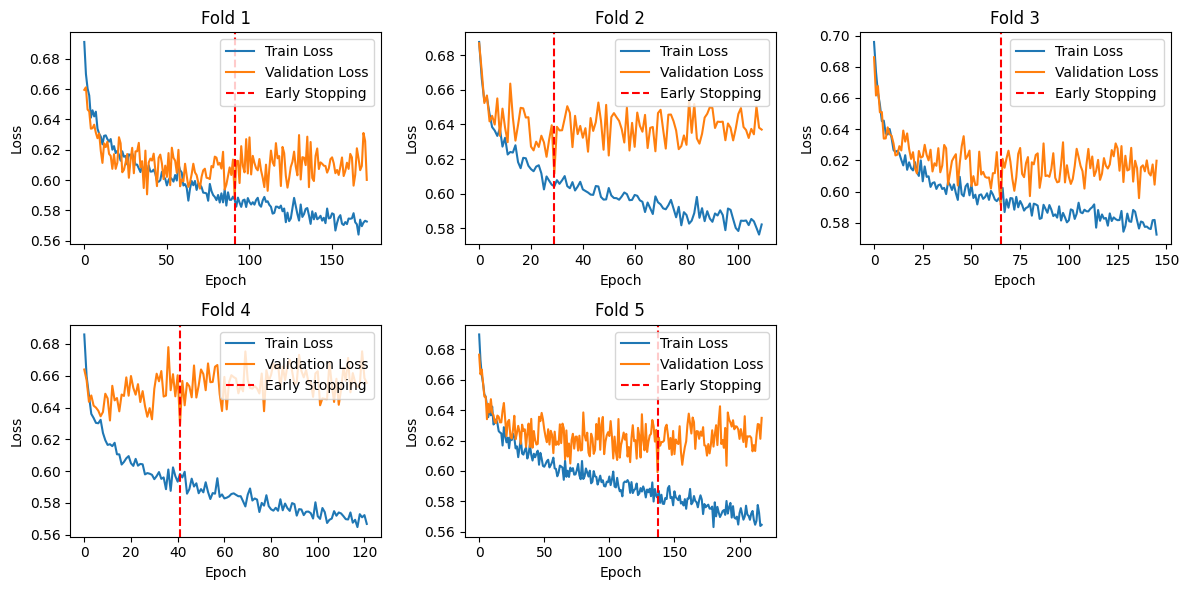

In [9]:
# print all losses for each fold on different subplots
plt.figure(figsize=(12, 6))
for i in range(N_FOLDS):
    plt.subplot(2, 3, i + 1)
    plt.plot(all_train_losses[i], label='Train Loss')
    plt.plot(all_val_losses[i], label='Validation Loss')
    plt.axvline(all_last_indexes[i], color='r', linestyle='--', label='Early Stopping')
    plt.title(f'Fold {i + 1}')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')
plt.tight_layout()
plt.show()


## Testing

In [11]:
tennis_test_dataset = TennisMatchDataset([
                                            'past-winston-salem-atp-singles',
                                          ])
nb_errors = 0
list_vectors_test = []
list_labels_test = []
list_matches_ids_test = []

list_vectors_test, list_labels_test, list_matches_ids_test, nb_errors = tennis_test_dataset.get_past_vectors()


print(f'Number of errors : {nb_errors} over {len(tennis_test_dataset.get_matches_ids())} matches')

print(f'Number of vectors : {len(list_vectors_test)}')
input_shapes = []
for i in range(len(list_vectors_test[0])):
    input_shapes.append(len(list_vectors_test[0][i]))
print(f'Input shapes : {input_shapes}')

# remove vectors where there is too much missing values ie too much c.PADDING values in all the vectors
new_list_vectors_test = []
new_list_labels_test = []
new_list_matches_ids_test = []

for i in tqdm(range(len(list_vectors_test))) :
    vector = list_vectors_test[i]
    num_padding = 0
    for spe_vec in vector :
        num_padding += spe_vec.count(c.PADDING)
    if num_padding < MAX_PADDED and list_labels_test[i] != c.PADDING:
        new_list_vectors_test.append(vector)
        new_list_labels_test.append(list_labels_test[i])
        new_list_matches_ids_test.append(list_matches_ids_test[i])
print(f'Number of vectors after removing vectors with too much missing values : {len(new_list_vectors_test)}')

if len(new_list_vectors_test) == 0:
    print('No data to predict')
    sys.exit(0)

tournament_features_vector_test = []
player1_features_vector_test = []
player2_features_vector_test = []
h2h_overall_vector_test = []
h2h_surface_vector_test = []
shape_overall_player1_vector_test = []
shape_overall_player2_vector_test = []

for vector in new_list_vectors_test:
    tournament_features_vector_test.append(vector[0])
    player1_features_vector_test.append(vector[1])
    player2_features_vector_test.append(vector[2])
    h2h_overall_vector_test.append(vector[3])
    h2h_surface_vector_test.append(vector[4])
    shape_overall_player1_vector_test.append(vector[5])
    shape_overall_player2_vector_test.append(vector[6])

# convert to pytorch tensor
tournament_features_tensor_test = torch.tensor(tournament_features_vector_test, dtype=torch.float)
tournament_features_mask_test = torch.zeros_like(tournament_features_tensor_test)
tournament_features_mask_test[tournament_features_tensor_test != c.PADDING] = 1.
player1_features_tensor_test = torch.tensor(player1_features_vector_test, dtype=torch.float)
player1_features_mask_test = torch.zeros_like(player1_features_tensor_test)
player1_features_mask_test[player1_features_tensor_test != c.PADDING] = 1.
player2_features_tensor_test = torch.tensor(player2_features_vector_test, dtype=torch.float)
player2_features_mask_test = torch.zeros_like(player2_features_tensor_test)
player2_features_mask_test[player2_features_tensor_test != c.PADDING] = 1.
h2h_overall_tensor_test = torch.tensor(h2h_overall_vector_test, dtype=torch.float)
h2h_overall_mask_test = torch.zeros_like(h2h_overall_tensor_test)
h2h_overall_mask_test[h2h_overall_tensor_test != c.PADDING] = 1.
h2h_surface_tensor_test = torch.tensor(h2h_surface_vector_test, dtype=torch.float)
h2h_surface_mask_test = torch.zeros_like(h2h_surface_tensor_test)
h2h_surface_mask_test[h2h_surface_tensor_test != c.PADDING] = 1.
shape_overall_player1_tensor_test = torch.tensor(shape_overall_player1_vector_test, dtype=torch.float)
shape_overall_player1_mask_test = torch.zeros_like(shape_overall_player1_tensor_test)
shape_overall_player1_mask_test[shape_overall_player1_tensor_test != c.PADDING] = 1.
shape_overall_player2_tensor_test = torch.tensor(shape_overall_player2_vector_test, dtype=torch.float)
shape_overall_player2_mask_test = torch.zeros_like(shape_overall_player2_tensor_test)
shape_overall_player2_mask_test[shape_overall_player2_tensor_test != c.PADDING] = 1.

label_vector = []
for label in new_list_labels_test:
    label_vector.append(label)

label_tensor_test = torch.tensor(label_vector)

test_dataset = TensorDataset(tournament_features_tensor_test, 
                             tournament_features_mask_test, 
                             player1_features_tensor_test, 
                             player1_features_mask_test, 
                             player2_features_tensor_test, 
                             player2_features_mask_test,
                             h2h_overall_tensor_test, 
                             h2h_overall_mask_test, 
                             h2h_surface_tensor_test, 
                             h2h_surface_mask_test, 
                             shape_overall_player1_tensor_test, 
                             shape_overall_player1_mask_test, 
                             shape_overall_player2_tensor_test, 
                             shape_overall_player2_mask_test, 
                             label_tensor_test)

test_dataloader = DataLoader(test_dataset, batch_size=64, shuffle=False)

all_predictions = []
for j in range(N_FOLDS):
    if j + 1 not in badly_trained_folds:
        model = TennisMatchPredictor(input_shapes)
        model.load_state_dict(torch.load(f'{c2.REPO_PATH}/tennis/models/best_model_fold_{j + 1}.pth'))
        model.eval()
        predictions = []
        with torch.no_grad():
            test_loss = 0.0
            for i, data in enumerate(test_dataloader):
                tournament_features, tournament_mask, player1_features, player1_mask, player2_features, player2_mask, h2h_overall, h2h_overall_mask, h2h_surface, h2h_surface_mask, shape_overall_player1, shape_overall_player1_mask, shape_overall_player2, shape_overall_player2_mask, labels = data
                outputs = model(tournament_features = tournament_features, 
                                player1_features = player1_features, 
                                player2_features = player2_features, 
                                h2h_overall = h2h_overall, 
                                h2h_surface = h2h_surface, 
                                shape_overall_player1 = shape_overall_player1, 
                                shape_overall_player2 = shape_overall_player2,
                                tournament_mask = tournament_mask, 
                                player1_mask = player1_mask, 
                                player2_mask = player2_mask, 
                                h2h_overall_mask = h2h_overall_mask,
                                h2h_surface_mask = h2h_surface_mask,
                                shape_overall_player1_mask = shape_overall_player1_mask,
                                shape_overall_player2_mask = shape_overall_player2_mask
                                )    
                predictions.append(outputs)        
                loss = criterion(outputs,  (labels.unsqueeze(1).float()+1)/2)
                test_loss += loss.item()
            print(f'Test Loss: for {j+1} : {test_loss/len(test_dataloader):.2f}')
        # find the matches where the model is the most confident and was right
        predictions = torch.cat(predictions).flatten()
        all_predictions.append(predictions)

all_predictions = torch.stack(all_predictions)
predictions = all_predictions.mean(dim=0)

# get the indexes of the matches where the model was right
# create data frame with the predictions and the labels and the match ids
df = pd.DataFrame(columns=['match_id', 'predictions', 'labels'])
df['predictions'] = predictions
df['labels'] = label_tensor_test
df['match_id'] = new_list_matches_ids_test
# order the data frame by predictions values
df = df.sort_values(by='predictions', ascending=False)

# fetch the odds of betclic for the matches
odds_1_list = []
odds_2_list = []
prob_list = []
for match_id in df['match_id']:
    match_odds =tennis_test_dataset.get_match(match_id).get_odds()
    odds_found = False
    for match_odd in match_odds:
        if match_odd['bookmaker'] == 'Betclic.fr':
            odds_found = True
            odds_1_list.append(float(match_odd['odds'][0]))
            odds_2_list.append(float(match_odd['odds'][1]))
            player1odd = float(match_odd['odds'][0])
            player2odd = float(match_odd['odds'][1])
            prob_win_player1 = 1/player1odd
            prob_win_player2 = 1/player2odd
            # normalize the probabilities
            prob_sum = prob_win_player1 + prob_win_player2
            prob_win_player1 = prob_win_player1/prob_sum
            prob_win_player2 = prob_win_player2/prob_sum
            prob_list.append(2*prob_win_player1-1)
            break
    if not odds_found:
        odds_1_list.append(None)
        odds_2_list.append(None)
        prob_list.append(None) 

df['odds_1'] = odds_1_list
df['odds_2'] = odds_2_list
df['bookmaker_pred'] = prob_list
df = df.loc[df['odds_1'].notnull()]

Loading data for tournaments {'past-winston-salem-atp-singles'} ...
... loaded 58 matches
Updating id table ...
... id table updated


100%|██████████| 1/1 [00:00<00:00, 31.13it/s]

Error 'cd85' for match OIimxJFD in tournament past-winston-salem-atp-singles
Error 'cd85' for match MX1eM9f5 in tournament past-winston-salem-atp-singles
Error 'cd85' for match pKE5S3wh in tournament past-winston-salem-atp-singles
Error 'cd85' for match EciN6G46 in tournament past-winston-salem-atp-singles
Error 'm0aw' for match 2R1YE2Ya in tournament past-winston-salem-atp-singles
Error 'k0ee' for match jFfSIEqA in tournament past-winston-salem-atp-singles
Error 'kg27' for match rkiKKzFc in tournament past-winston-salem-atp-singles
Error 'o522' for match ru8yQbT6 in tournament past-winston-salem-atp-singles
Error 'm0aw' for match b95pAQH5 in tournament past-winston-salem-atp-singles
Error 'kg27' for match nkxuX2s9 in tournament past-winston-salem-atp-singles
Error 'k0ee' for match lY6jnunK in tournament past-winston-salem-atp-singles
Error 's0de' for match pATww7YP in tournament past-winston-salem-atp-singles
Error 'k0ee' for match hAqgEGno in tournament past-winston-salem-atp-singles

  0%|          | 0/38 [00:00<?, ?it/s]

Number of vectors after removing vectors with too much missing values : 27
Test Loss: for 1 : 0.76
Test Loss: for 2 : 0.79
Test Loss: for 3 : 0.64
Test Loss: for 4 : 0.64
Test Loss: for 5 : 0.71


## Betting

Match : KKZJlNRN Rinderknech A. - O'Connell C., bet on player 1 (model pred = 0.78), amount to bet : 4.31, odds : 1.62, label : 1.00, total amount : 102.67
Match : KKZJlNRN Rinderknech A. - O'Connell C., no bet on player 2 (model pred =0.06)
Match : MXHIDUwp Van De Zandschulp B. - Cazaux A., bet on player 1 (model pred =0.78), amount to bet : 5.32, odds : 1.84, label : -1.00, total amount : 97.35
Match : MXHIDUwp Van De Zandschulp B. - Cazaux A., no bet on player 2 (model pred =0.06)
Match : 4tFNaL7m Michelsen A. - Eubanks C., bet on player 1 (model pred = 0.77), amount to bet : 0.09, odds : 1.31, label : 1.00, total amount : 97.38
Match : 4tFNaL7m Michelsen A. - Eubanks C., no bet on player 2 (model pred =0.07)
Match : 8Gx90f0N Goffin D. - Darderi L., bet on player 1 (model pred = 0.76), amount to bet : 3.78, odds : 1.65, label : 1.00, total amount : 99.84
Match : 8Gx90f0N Goffin D. - Darderi L., no bet on player 2 (model pred =0.07)
Match : 8lGQB88d Coric B. - Nagal S., no bet on pla

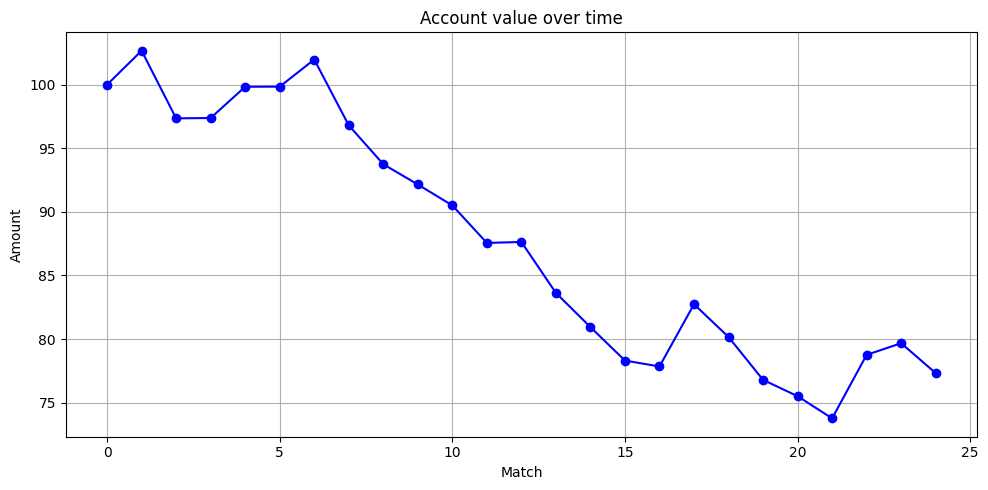

In [12]:
# Strategy results : bet the proportion given by the kelly criterion on each match
INIT_AMOUNT = 100 # euros
GREEN = '\033[92m'
RED = '\033[91m'
RESET = '\033[0m'
# bet on player 1


# Kelly criterion
def kelly_criterion(odds, prob, safe=0.1):
    return (prob - ((1- prob)/(odds-1)))*safe

test = df.copy()
test['prob_player1'] = ((1+test['predictions'])/2)**1.5
test['prob_player2'] = ((1-test['predictions'])/2)**1.5
# apply keely criterion
test['kelly_criterion_player1'] = test.apply(lambda row : kelly_criterion(row['odds_1'], row['prob_player1']), axis=1)
test['kelly_criterion_player2'] = test.apply(lambda row : kelly_criterion(row['odds_2'], row['prob_player2']), axis=1)

account_values = []

amount = INIT_AMOUNT
account_values.append(amount)
# try the model 
for i, row in test.iterrows():
    player1 = tennis_test_dataset.get_match(row['match_id']).get_players()[0]
    player2 = tennis_test_dataset.get_match(row['match_id']).get_players()[1]
    if row['kelly_criterion_player1'] > 0.0 :
        # betting on player 1
        bet = amount * row['kelly_criterion_player1']
        # win or lose
        if row['labels'] == 1:
            amount += bet * (row['odds_1']-1)
            print(f"{GREEN}Match : {row['match_id']} {player1} - {player2}, bet on player 1 (model pred = {row['prob_player1']:.2f}), amount to bet : {bet:.2f}, odds : {row['odds_1']:.2f}, label : {row['labels']:.2f}, total amount : {amount:.2f}{RESET}")
        else:
            amount -= bet
            print(f"{RED}Match : {row['match_id']} {player1} - {player2}, bet on player 1 (model pred ={row['prob_player1']:.2f}), amount to bet : {bet:.2f}, odds : {row['odds_1']:.2f}, label : {row['labels']:.2f}, total amount : {amount:.2f}{RESET}")
        account_values.append(amount)
    else : 
        print(f"Match : {row['match_id']} {player1} - {player2}, no bet on player 1 (model pred ={row['prob_player1']:.2f})")
    if row['kelly_criterion_player2'] > 0.0 :
        # betting on player 2
        bet = amount * row['kelly_criterion_player2']
        # win or lose
        if row['labels'] == -1:
            amount += bet * (row['odds_2']-1)
            print(f"{GREEN}Match : {row['match_id']} {player1} - {player2}, bet on player 2 (model pred ={row['prob_player2']:.2f}), amount to bet : {bet:.2f}, odds : {row['odds_2']:.2f}, label : {row['labels']:.2f}, total amount : {amount:.2f}{RESET}")
        else:
            amount -= bet
            print(f"{RED}Match : {row['match_id']} {player1} - {player2}, bet on player 2 (model pred ={row['prob_player2']:.2f}), amount to bet : {bet:.2f}, odds : {row['odds_2']:.2f}, label : {row['labels']:.2f}, total amount : {amount:.2f}{RESET}")
        account_values.append(amount)
    else :
        print(f"Match : {row['match_id']} {player1} - {player2}, no bet on player 2 (model pred ={row['prob_player2']:.2f})")
print(f"\nTotal amount after betting : {amount:.2f}")
if amount > INIT_AMOUNT:
    print(f"{GREEN}Relative won {(amount-INIT_AMOUNT)/INIT_AMOUNT*100:.2f}%{RESET}")
else:
    print(f"{RED}Relative lost {(INIT_AMOUNT-amount)/INIT_AMOUNT*100:.2f}%{RESET}")

plt.figure(figsize=(10, 5))
plt.plot(account_values, label='Account value', color='blue', marker='o')
plt.xlabel('Match')
plt.ylabel('Amount')
plt.title('Account value over time')
plt.grid()
plt.tight_layout()
plt.show()
# print the results of the strategy


## Autre

### Kelly + threshold

Match : KKZJlNRN Rinderknech A. - O'Connell C., bet on player 1 (0.85), amount to bet : 7.56, odds : 1.62, label : 1.00, total amount : 104.68
Match : MXHIDUwp Van De Zandschulp B. - Cazaux A., bet on player 1 (0.85), amount to bet : 8.00, odds : 1.84, label : -1.00, total amount : 96.68
Match : 4tFNaL7m Michelsen A. - Eubanks C., bet on player 1 (0.84), amount to bet : 6.89, odds : 1.31, label : 1.00, total amount : 98.82
Match : 8Gx90f0N Goffin D. - Darderi L., bet on player 1 (0.83), amount to bet : 7.22, odds : 1.65, label : 1.00, total amount : 103.51
Match : 8lGQB88d Coric B. - Nagal S., bet on player 1 (0.82), amount to bet : 7.06, odds : 1.32, label : 1.00, total amount : 105.77
Match : djxijd7j Muller A. - Lestienne C., bet on player 1 (0.81), amount to bet : 7.12, odds : 1.37, label : 1.00, total amount : 108.40
Match : j5BqOxbJ Goffin D. - Munar J., bet on player 1 (0.81), amount to bet : 7.47, odds : 1.68, label : 1.00, total amount : 113.48
Match : 2ugafJR8 Coric B. - Hiji

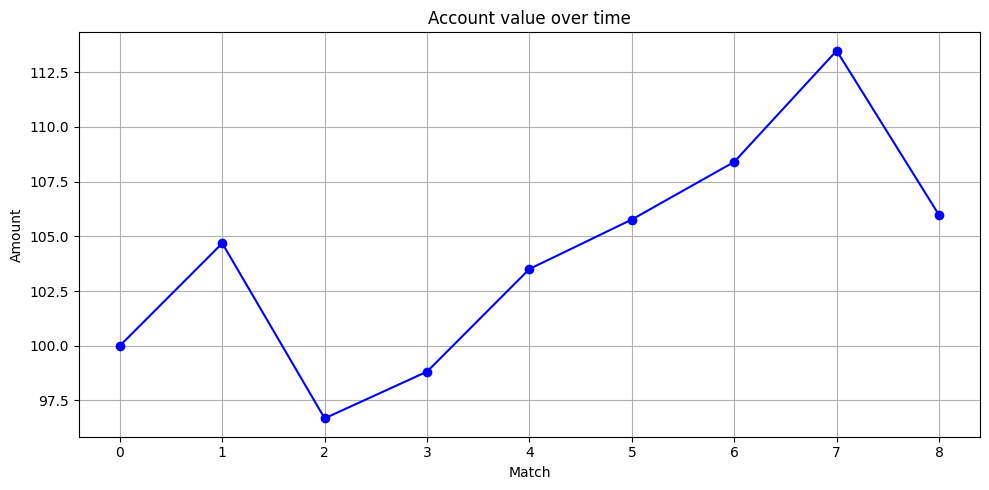

In [13]:
PROB_THRESHOLD = 0.6

def kelly_criterion(odds, prob, safe=0.1):
    return (prob - ((1- prob)/(odds)))*safe

# if predictions > 0.6 bet on player 1, if predictions < -0.6 bet on player 2
bet_on_player_1_df = df.loc[df['predictions'] > PROB_THRESHOLD].copy()
bet_on_player_1_df['prediction_prob']= bet_on_player_1_df['predictions'].apply(lambda x : (1+x)/2)
bet_on_player_1_df['kelly_criterion'] = bet_on_player_1_df.apply(lambda row : kelly_criterion(row['odds_1'], row['prediction_prob']), axis=1)

bet_on_player_2_df = df.loc[df['predictions'] < -PROB_THRESHOLD].copy()
bet_on_player_2_df['prediction_prob']= bet_on_player_2_df['predictions'].apply(lambda x : (1-x)/2)
bet_on_player_2_df['kelly_criterion'] = bet_on_player_2_df.apply(lambda row : kelly_criterion(row['odds_2'], row['prediction_prob']), axis=1)
account_values = []
total_amount = INIT_AMOUNT
account_values.append(total_amount)
for i, row in bet_on_player_1_df.iterrows():
    player1 = tennis_test_dataset.get_match(row['match_id']).get_players()[0]
    player2 = tennis_test_dataset.get_match(row['match_id']).get_players()[1]
    amout_to_bet = max(row['kelly_criterion']*total_amount, 0)
    if row['labels'] == 1:
        total_amount += amout_to_bet*(row['odds_1']-1)
        print(f"{GREEN}Match : {row['match_id']} {player1} - {player2}, bet on player 1 ({row['prediction_prob']:.2f}), amount to bet : {amout_to_bet:.2f}, odds : {row['odds_1']:.2f}, label : {row['labels']:.2f}, total amount : {total_amount:.2f}{RESET}")
    else:
        total_amount -= amout_to_bet
        print(f"{RED}Match : {row['match_id']} {player1} - {player2}, bet on player 1 ({row['prediction_prob']:.2f}), amount to bet : {amout_to_bet:.2f}, odds : {row['odds_1']:.2f}, label : {row['labels']:.2f}, total amount : {total_amount:.2f}{RESET}")
    account_values.append(total_amount)

for i, row in bet_on_player_2_df.iterrows():
    player1 = tennis_test_dataset.get_match(row['match_id']).get_players()[0]
    player2 = tennis_test_dataset.get_match(row['match_id']).get_players()[1]
    amout_to_bet = max(row['kelly_criterion']*total_amount, 0)
    if row['labels'] == -1:
        total_amount += amout_to_bet*(row['odds_2']-1)
        print(f"{GREEN}Match : {row['match_id']} {player1} - {player2}, bet on player 2 ({row['prediction_prob']:.2f}), amount to bet : {amout_to_bet:.2f}, odds : {row['odds_2']:.2f}, label : {row['labels']:.2f}, total amount : {total_amount:.2f}{RESET}")
    else:
        total_amount -= amout_to_bet
        print(f"{RED}Match : {row['match_id']} {player1} - {player2}, bet on player 2 ({row['prediction_prob']:.2f}), amount to bet : {amout_to_bet:.2f}, odds : {row['odds_2']:.2f}, label : {row['labels']:.2f}, total amount : {total_amount:.2f}{RESET}")
    account_values.append(total_amount)
print(f"\nTotal amount after betting : {total_amount:.2f}")
if total_amount >= INIT_AMOUNT:
    print(f"{GREEN}Relative won {(total_amount-INIT_AMOUNT)/INIT_AMOUNT*100:.2f}%{RESET}")
else:
    print(f"{RED}Relative lost {(INIT_AMOUNT-total_amount)/INIT_AMOUNT*100:.2f}%{RESET}")

plt.figure(figsize=(10, 5))
plt.plot(account_values, label='Account value', color='blue', marker='o')
plt.xlabel('Match')
plt.ylabel('Amount')
plt.title('Account value over time')
plt.grid()
plt.tight_layout()
plt.show()